In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [2]:
titanic = pd.read_csv("./Dataset/titanic2.csv")

In [3]:
titanic.shape

(1309, 14)

In [4]:
# Create X(feature matrix)
X = titanic.drop("Survived", axis=1)

# Create y (labels)
y = titanic["Survived"]

In [50]:
# x.to_csv('titanic2.csv', index=False )

In [5]:
X.shape, y.shape

((1309, 13), (1309,))

In [6]:
X.isnull().sum()

PassengerId       0
Pclass            0
Name              0
EmbarkedEncode    0
Age               0
SibSp             0
Parch             0
Fare              0
SexEncode         0
TitleEncode       0
Adult/Child       0
AgeEncode         0
TotalMembers      0
dtype: int64

In [7]:
X = X.drop(["Name"], axis=1)

In [8]:
X.dtypes

PassengerId         int64
Pclass              int64
EmbarkedEncode      int64
Age               float64
SibSp               int64
Parch               int64
Fare              float64
SexEncode           int64
TitleEncode         int64
Adult/Child         int64
AgeEncode          object
TotalMembers        int64
dtype: object

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [70]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [71]:
# 3. Fit the model to the training data


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
#SVM
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

62.94


In [73]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_linear_svc)

83.38


C:\Users\tanzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [74]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

80.13


In [75]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

100.0


In [76]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

100.0


In [77]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (acc_gnb)

84.62


In [78]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print (acc_perceptron)

42.79


In [79]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print (acc_sgd)

39.16


Accuracy: 100 % 

Confusion Matrix in Numbers
[[637   0]
 [  0 410]]

Confusion Matrix in Percentage
[[1. 0.]
 [0. 1.]]



<AxesSubplot:>

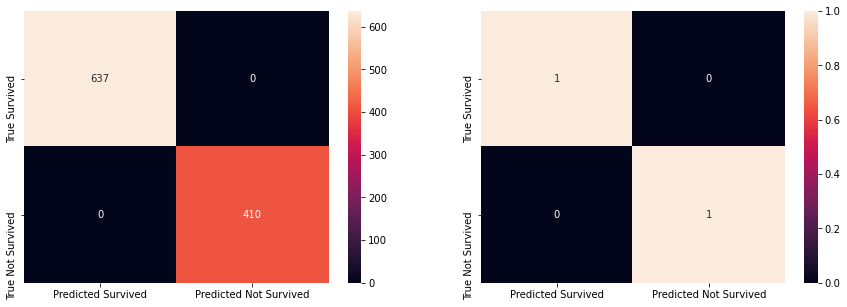

In [80]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

In [83]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

NameError: name 'acc_log_reg' is not defined

In [57]:
clf.fit(X_train, y_train);

In [58]:
X_train

,PassengerId,Pclass,EmbarkedEncode,Age,SibSp,Parch,Fare,SexEncode,TitleEncode,Adult/Child
381,382,3,1,1.00,0,2,15.7417,1,2,1
500,501,3,3,17.00,0,0,8.6625,2,1,1
609,610,1,3,40.00,0,0,153.4625,1,2,2
1000,1001,2,3,18.50,0,0,13.0000,2,1,2
182,183,3,3,9.00,4,2,31.3875,2,4,1
...,...,...,...,...,...,...,...,...,...,...
557,558,1,1,32.00,0,0,227.5250,2,1,2
1141,1142,2,3,0.92,1,2,27.7500,1,2,1
1143,1144,1,1,27.00,1,0,136.7792,2,1,2
1018,1019,3,2,22.00,2,0,23.2500,1,2,2


In [59]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
      dtype=int64)

In [60]:
y_test

819     0
1217    1
898     0
243     0
114     0
       ..
392     0
576     1
491     0
823     1
1115    1
Name: Survived, Length: 262, dtype: int64

In [61]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [62]:
clf.score(X_test, y_test)

0.8854961832061069

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       161
           1       0.88      0.81      0.85       101

    accuracy                           0.89       262
   macro avg       0.88      0.87      0.88       262
weighted avg       0.89      0.89      0.88       262



In [64]:
confusion_matrix(y_test, y_preds)

array([[150,  11],
       [ 19,  82]], dtype=int64)

In [65]:
accuracy_score(y_test, y_preds)

0.8854961832061069

In [67]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 200, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 87.40%

Trying model with 20 estimators...
Model accuracy on test set: 86.64%

Trying model with 30 estimators...
Model accuracy on test set: 87.40%

Trying model with 40 estimators...
Model accuracy on test set: 88.17%

Trying model with 50 estimators...
Model accuracy on test set: 87.40%

Trying model with 60 estimators...
Model accuracy on test set: 87.79%

Trying model with 70 estimators...
Model accuracy on test set: 86.64%

Trying model with 80 estimators...
Model accuracy on test set: 88.17%

Trying model with 90 estimators...
Model accuracy on test set: 88.93%

Trying model with 100 estimators...
Model accuracy on test set: 87.40%

Trying model with 110 estimators...
Model accuracy on test set: 88.93%

Trying model with 120 estimators...
Model accuracy on test set: 88.17%

Trying model with 130 estimators...
Model accuracy on test set: 88.93%

Trying model with 140 estimators...
Model accuracy on test set: 87.02%

T

In [68]:
import pickle

pickle.dump(clf, open("random_forst_model_1.pkl", "wb"))

In [69]:
loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8931297709923665